## P2 CREDIT_CARD_FRAUD_DETECTION - Preditive model

### The objective of this notebook is using the pré processed data in previous in P1 and make prevision model
### And apply de NearMiss e Smooth tecnics to lead with unbalanced dataset 

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#  1 INITIAL MODEL IMPLEMENTATION

# 1.1 Load the pré processed data

In [2]:
#displaying all the rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# load the data of application_data
df_app=pd.read_csv("dataReducted.csv",encoding = "latin-1")

In [4]:
df_app.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,9.0,Laborers,1.0,2,2,Business Entity Type 3,1.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,9.0,Core staff,2.0,1,1,School,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,26.0,Laborers,1.0,2,2,Government,0.0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9.0,Laborers,2.0,2,2,Business Entity Type 3,1.0
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,9.0,Core staff,1.0,2,2,Religion,0.0


In [5]:
df_app.columns

Index(['Unnamed: 0', 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

# 1.2 Applying the Logistical regression

In [6]:
# splitting data in train and test
from sklearn.model_selection import train_test_split

In [7]:
# using only the numeric features
features = ['CNT_CHILDREN',
            'AMT_INCOME_TOTAL',
            'AMT_CREDIT',
            'AMT_ANNUITY',
            'AMT_GOODS_PRICE',
            'REGION_POPULATION_RELATIVE',
            'DAYS_BIRTH',   
            'DAYS_EMPLOYED',   
            'OWN_CAR_AGE', 
            'CNT_FAM_MEMBERS', 
            'REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY', 
            'AMT_REQ_CREDIT_BUREAU_YEAR']

X =  df_app[features]
y =  df_app['TARGET']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
# training and adjusting the logistic regression model in train set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [10]:
logmodel = LogisticRegression()

In [11]:
logmodel.fit(X_train,y_train)

LogisticRegression()

# 1.3 Evaluating the regression model

In [12]:
# prediction 
ỹ_test = logmodel.predict(X_test)

In [13]:

accuracy_score(y_test, ỹ_test)

0.9195161211648212

In [14]:
print(classification_report(y_test,ỹ_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



In [15]:

#print (
pd.crosstab(y_test,ỹ_test, rownames=['Real'], colnames=['Predito'], margins=True)
#)

Predito,0,1,All
Real,,,
0,56553,1,56554
1,4949,0,4949
All,61502,1,61503


In [16]:
# metrics.accuracy_score(y_test, ỹ_test)

# because the model is not balanced the estimation of the 
# the CATEGORIC 1 - WHO HAVE PROBLEMS TO PAY THE LOAN HAVE NOT GOOD RESULT

# 2 Showing unbalanced aspects of  THE DATA

In [17]:
# REVIEWING DATA ASPECTS
pay_diff=df_app[df_app.TARGET==1]
pay=df_app[df_app.TARGET==0]

# % withh dificult in pay
a=pay_diff['TARGET'].sum()/df_app['TARGET'].shape[0]*100
print('% with dificult in pay =', a)
a=pay_diff['TARGET'].sum()#/df_app['TARGET'].shape[0]*100
print(' numbers with dificult in pay =', a)


# % who didn't had problem in pay
a=len(pay['TARGET'])/df_app['TARGET'].shape[0]*100
print(' \n % without dificult in pay =', a)
# sum of 0 was 0

a=len(pay['TARGET'])#/df_app['TARGET'].shape[0]*100
print('numbers without dificult in pay =', a)

% with dificult in pay = 8.072881945686495
 numbers with dificult in pay = 24825
 
 % without dificult in pay = 91.92711805431351
numbers without dificult in pay = 282686


Text(0.5, 1.0, 'TARGET per GENDER')

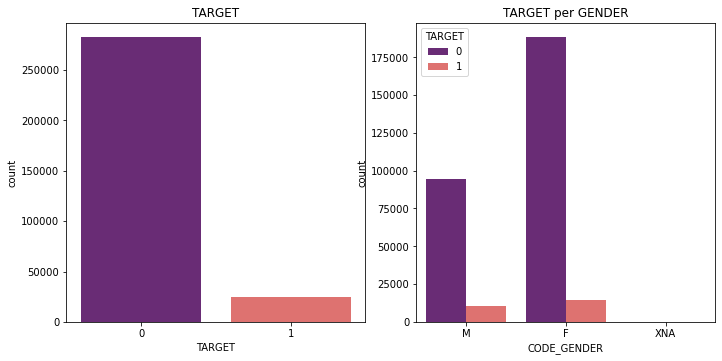

In [18]:
#
fig, ax =plt.subplots(1,2,figsize=(10,5))
plt.tight_layout(2)

#/df_app.shape[0]*100
sns.countplot(df_app['TARGET'], palette='magma',ax=ax[0]).set_title('TARGET')
sns.countplot(df_app['CODE_GENDER'], hue=df_app.TARGET, palette='magma',ax=ax[1]).set_title('TARGET per GENDER')

# Acording with the dictionary we have a TARGET where  
# 1- the client have the dificult to pay
# 0- the client don't have dificult to pay

# it is noticed that the target is highly unbalanced
# women borrow more
# but in proportion to the difficulty in performing the pattern similar to the men's difficulty

## make some code of agreggations and generat tables?

In [19]:
# TRANSFORMA COLUNAS CATEGORICAS EM NUMERICAS
# df = pd.get_dummies(df)

# 3 Apply NearMiss
- Undersampling metod
- equaling the sampling classes in the minor quantity (reducing the largest one)

https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html

In [20]:
#!pip install imblearn

In [21]:
from imblearn.under_sampling import NearMiss 

In [22]:
#instance of NearMiss
nr = NearMiss()

In [23]:
# copy the data classes
X1 = X
y1 = y

In [24]:
X1.head() 

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,9.0,1.0,2,2,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,9.0,2.0,1,1,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,26.0,1.0,2,2,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9.0,2.0,2,2,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,9.0,1.0,2,2,0.0


In [25]:
y1.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [26]:
# aply to make the classes equal
X1, y1 = nr.fit_resample(X1,y1)

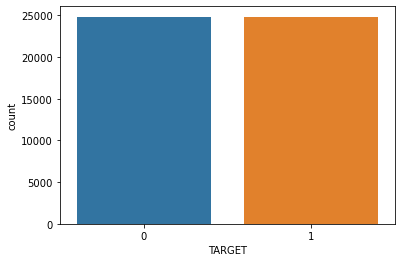

In [27]:
# verify the quantity of the class 
ax = sns.countplot(x=y1)

# 3.1 Aplying logistic regression in data after the NearMiss

In [28]:
# spliting data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [29]:
logmodel_1 = LogisticRegression()
logmodel_1.fit(X_train1,y_train1)

LogisticRegression()

In [30]:
ỹ_test1 = logmodel_1.predict(X_test1)
accuracy_score(y_test1, ỹ_test1)
# in this balanced dataset the accuary score was less than in the unbalanced dataset

0.641792547834844

In [31]:
print(classification_report(y_test1,ỹ_test1))

# differently of the 1 Atempt where we were not able to estimate the class with less samples CLASS 1 (DIFICULT IN PAY)
# BUT because of the reduction of the data we had a decresead in the indicators 
# precision
# recall 
# f1-score


              precision    recall  f1-score   support

           0       0.65      0.61      0.63      4953
           1       0.64      0.67      0.65      4977

    accuracy                           0.64      9930
   macro avg       0.64      0.64      0.64      9930
weighted avg       0.64      0.64      0.64      9930



In [32]:
#print (
pd.crosstab(y_test1,ỹ_test1, rownames=['Real'], colnames=['Predito'], margins=True)
#)

Predito,0,1,All
Real,,,
0,3038,1915,4953
1,1642,3335,4977
All,4680,5250,9930


# 3.2 increasing the size test to 30%

In [33]:
# spliting data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [34]:
ỹ_test1 = logmodel_1.predict(X_test1)
accuracy_score(y_test1, ỹ_test1)


0.6395434709634106

In [35]:
print(classification_report(y_test1,ỹ_test1))
# the increasing to 30% in test size apparently did not shown an expressive change in the indicators of the classification

              precision    recall  f1-score   support

           0       0.65      0.61      0.63      7436
           1       0.63      0.67      0.65      7459

    accuracy                           0.64     14895
   macro avg       0.64      0.64      0.64     14895
weighted avg       0.64      0.64      0.64     14895



In [36]:
#print (
pd.crosstab(y_test1,ỹ_test1, rownames=['Real'], colnames=['Predito'], margins=True)
#)

Predito,0,1,All
Real,,,
0,4508,2928,7436
1,2441,5018,7459
All,6949,7946,14895


#  4 SMOTE (Synthetic Minority Over-sampling Technique)
- Sintetic Data was generated of the minor class

###### https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

###### https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [37]:
# copy the data classes
X2 = X
y2 = y

In [38]:
# seeing data per class
np.bincount(y2)

array([282686,  24825], dtype=int64)

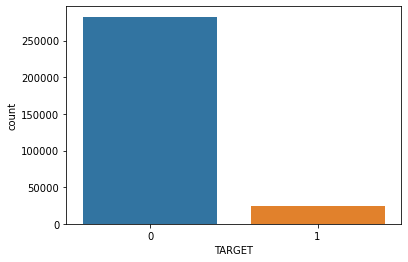

In [39]:
ax = sns.countplot(x=y2)

In [40]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
# sampling_strategy=0.5
#  \alpha_{os} = N_{rm} / N_{M}
smt = SMOTE(sampling_strategy=1)

In [41]:
# Aply soomte in the dataset
X2, y2 = smt.fit_resample(X2,y2)
#fit_sample(X, y)

In [42]:
# seeing data per class
np.bincount(y2)

array([282686, 282686], dtype=int64)

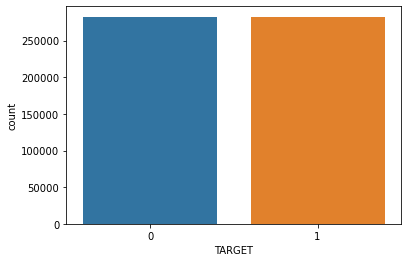

In [43]:
ax = sns.countplot(x=y2)

# 4.1 Aplying logistic regression in data after the SMOTE

In [44]:
# spliting data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [45]:
logmodel_2 = LogisticRegression()
logmodel_2.fit(X_train2,y_train2)

LogisticRegression()

In [46]:
ỹ_test2 = logmodel_2.predict(X_test2)
accuracy_score(y_test2, ỹ_test2)

0.5747954897192129

In [47]:
print(classification_report(y_test2,ỹ_test2))
# not only the accuracy but the others metrics were worst than the case of the NearMiss

              precision    recall  f1-score   support

           0       0.57      0.58      0.58     56536
           1       0.58      0.56      0.57     56539

    accuracy                           0.57    113075
   macro avg       0.57      0.57      0.57    113075
weighted avg       0.57      0.57      0.57    113075



In [48]:
#print (
pd.crosstab(y_test2,ỹ_test2, rownames=['Real'], colnames=['Predito'], margins=True)
#)

Predito,0,1,All
Real,,,
0,33052,23484,56536
1,24596,31943,56539
All,57648,55427,113075


In [49]:
#from imblearn.over_sampling import fit
#fit(X2,y2)

# 4.2 Change SMOTE parameters

In [78]:
#  \alpha_{os} = N_{rm} / N_{M} minoriy/maiority classes
# copy the data classes
X2 = X
y2 = y
smt2 = SMOTE(sampling_strategy=1,k_neighbors=2)

In [79]:
np.bincount(y2)

array([282686,  24825], dtype=int64)

In [80]:
# Aply soomte in the dataset
X2, y2 = smt2.fit_resample(X2,y2)
#fit_sample(X, y)

In [81]:
# seeing data per class
np.bincount(y2)

array([282686, 282686], dtype=int64)

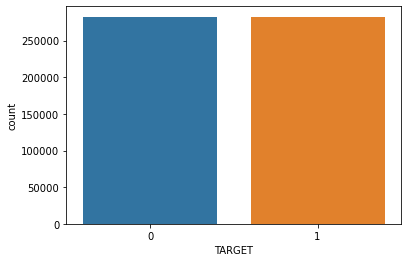

In [82]:
ax = sns.countplot(x=y2)

# 4.2.1 aplying logistic regression

In [83]:
# spliting data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [84]:
logmodel_2 = LogisticRegression()
logmodel_2.fit(X_train2,y_train2)

LogisticRegression()

In [85]:
ỹ_test2 = logmodel_2.predict(X_test2)
accuracy_score(y_test2, ỹ_test2)

0.5747070528410347

In [86]:
print(classification_report(y_test2,ỹ_test2))
# not only the accuracy but the others metrics were worst than the case of the NearMiss

              precision    recall  f1-score   support

           0       0.57      0.59      0.58     56536
           1       0.58      0.56      0.57     56539

    accuracy                           0.57    113075
   macro avg       0.57      0.57      0.57    113075
weighted avg       0.57      0.57      0.57    113075



In [87]:
#print (
pd.crosstab(y_test2,ỹ_test2, rownames=['Real'], colnames=['Predito'], margins=True)
#)

Predito,0,1,All
Real,,,
0,33089,23447,56536
1,24643,31896,56539
All,57732,55343,113075


In [ ]:
# Using the umbalanced Dataset

In [88]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,9.0,1.0,2,2,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,9.0,2.0,1,1,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,26.0,1.0,2,2,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9.0,2.0,2,2,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,9.0,1.0,2,2,0.0


In [89]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [90]:
# spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

In [92]:
# function to trian the decision tree model with max_depth parameter
def compara_modelos(maxdepth):
    if maxdepth == 0:
        dt = tree.DecisionTreeClassifier(random_state=1)
    else:   
        dt = tree.DecisionTreeClassifier(random_state=1, max_depth=maxdepth)
    dt.fit(X_train, y_train)
    train_score = dt.score(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    return train_score,test_score

compara_modelos(2)

(0.919205879483594, 0.9195323805342829)

In [93]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos(2))))
print('{:1}         {} '.format(3,str(compara_modelos(3))))
print('{:1}         {} '.format(4,str(compara_modelos(4))))
print('{:1}         {} '.format(10,str(compara_modelos(10))))
print('{:1}         {} '.format(15,str(compara_modelos(15))))
print('{:1}         {} '.format('Full',str(compara_modelos(0))))

depth      Training score       Testing score       
-----      --------------       -------------       
2         (0.919205879483594, 0.9195323805342829) 
3         (0.919205879483594, 0.9195323805342829) 
4         (0.919205879483594, 0.9195323805342829) 
10         (0.9204009625703229, 0.9181015560216574) 
15         (0.9283112744300999, 0.9098905744435231) 
Full         (1.0, 0.8432596783896721) 


In [96]:
# adoptede maxdepth =4
# training the model
dt = tree.DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [119]:
features = ['CNT_CHILDREN',
            'AMT_INCOME_TOTAL',
            'AMT_CREDIT',
            'AMT_ANNUITY',
            'AMT_GOODS_PRICE',
            'REGION_POPULATION_RELATIVE',
            'DAYS_BIRTH',   
            'DAYS_EMPLOYED',   
            'OWN_CAR_AGE', 
            'CNT_FAM_MEMBERS', 
            'REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY', 
            'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET']

df =  df_app[features]

In [120]:
# listting the most importants features of the model
fi = dt.feature_importances_

l = len(df.columns)
for i in range(0,len(df.columns)-1):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

CNT_CHILDREN........ 0.0
AMT_INCOME_TOTAL.... 0.0
AMT_CREDIT.......... 0.007780989734386391
AMT_ANNUITY......... 0.12149467325235627
AMT_GOODS_PRICE..... 0.19935474764729794
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH.......... 0.010270302828540818
DAYS_EMPLOYED....... 0.48270773837527514
OWN_CAR_AGE......... 0.004524648244987962
CNT_FAM_MEMBERS..... 0.0
REGION_RATING_CLIENT 0.01764954271154064
REGION_RATING_CLIENT_W_CITY 0.1528440937485299
AMT_REQ_CREDIT_BUREAU_YEAR 0.003373263457084925


In [122]:
#help(dt.feature_importances_)

In [125]:
ỹ_test = dt.predict(X_test)
ỹ_test
accuracy_score(y_test, ỹ_test)

# The accuracy result is near the logist regression

0.9195323805342829

In [127]:
print(classification_report(y_test,ỹ_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



In [129]:
#print (
pd.crosstab(y_test,ỹ_test, rownames=['Real'], colnames=['Predito'], margins=True)
#)
#Same as the logist REgression

Predito,0,All
Real,,
0,56554,56554
1,4949,4949
All,61503,61503


## Conclusion
- Using the unbalanced dataset and the the Logistic regression the minor class had bad result without be determined by the algorithm
- After using the NearMiss(Who equalize the major class with minor class) The logistic regression could estimate the minor class ( 1 - with dificult in pay ). Changing the test proportion to 30% instead to 20% the results did not shown significative difference.
- With SMOTE ( making sintetic data form minor class and equalazing) the logistic could too classify the minor class, but the accuracy score was low than the when used the NearMiss
- Finally was tryed change some parameter in the SMOTE but this did delivered results